# The Likelihood Function

The joint density of functions of data, $\vec{x}$, and parameters, $\vec{\theta}$, is given by their product

$$
f\left(\vec{x}; \vec{\theta}\right) = \prod_{i=1}^{n}\, f\left(\vec{x}_i; \vec{\theta}\right).
$$

**Notational Aside:**

The notation
$
f\left(\vec{x}\,; \vec{\theta}\right)
$
is meant to draw attention to the fact that the mulivariable function $f$ consists of both data and parameters, but that they are fundamentally different quantities. The use of "$;$" as the deimlinator
$$
f\left(\vec{x}\,; \vec{\theta}\right)
$$
is meant to indicate their difference, but not to imply conditional dependance as "$|$" does
$$
f\left(\vec{x}\,\big|\, \vec{\theta}\right).
$$

## Statistical Prediction

If the functions are probability density functions (p.d.f.) then if the parameters, $\vec{\theta}$, are known, and so fixed, then the probability density to observe the data, $\vec{x}$, is

$$
p\left(\vec{x}\right) = p\left(\vec{x} \,\big|\, \vec{\theta}\right) = \prod_{i=1}^{n}\, f\left(\vec{x}_i \,\big|\, \vec{\theta}\right) = \prod_{i=1}^{n}\, f\left(\vec{x}_i; \vec{\theta}\right).
$$

As $p\left(\vec{x} \,\big|\, \vec{\theta}\right)$ is a probability density function itself, then it is normalizable to unity

$$
\int p\left(\vec{x}\right)\,d\vec{x} = 1.
$$

## Statistical Inference

If the data, $\vec{x}$, have already been observed, and so are fixed, then the joint density is called the "likelihood". As the data are fixed then the likeilhood is a function of the parameters _**only**_

$$
L\left(\vec{\theta}\right) = L\left(\vec{\theta} \,\big|\, \vec{x}\right) = \prod_{i=1}^{n}\, f\left(\vec{\theta} \,\big|\, \vec{x}_i\right) = \prod_{i=1}^{n}\, f\left(\vec{x}_i; \vec{\theta}\right).
$$

## Properties of the Likelihood

The likelihood function has proven to be a difficult object to define clearly, as even Fisher only defined it as

> "the term \[...\] to designate the state of our information with respect to the parameters of hypothetical populations, and it is shown that the quantitative measure of likelihood does not obey the mathematical laws of probability." \[1\]

As the likelihood is a function of the parameters only, then it is seen that it is **a function of probability density functions given observed data**.

Its values represent the relative compatability (in some sense) of parameter values with the considered model given the observed data. The greater the value of the likelihood for a parameter value the more compatable the model (with that parameter value) is with the data. There is no sense of an absolute scale of a likelihood (given its formation from an arbitrary number of products of p.d.f.s), but rather its scale is the relative scale of its minimum value and maximum value.

>"There is therefore an absolute measure of probability in that the unit is chosen so as to make all the elementary probabilities add up to unity. There is no such absolute measure of likelihood." \[1\]

The likelihood is **not** a probability density. This can most easily be realized by noting that as the likelihood is a function of the parameters only it has no contstraint that it is normalized to unity. Indeed, it is not even required to be normalizable. \[1,2\]

$$
\int L\left(\vec{\theta}\right)\,d\vec{\theta} \text{ need not be normalizable}.
$$

### Example: A single sample from the Bernoulli distribution \[3\]

Given a single observation, $x$, from the Bernoulli distribution, with probability mass function (p.m.f) (which has $x \in \{0,1\}$)

$$
\displaystyle f_{\text{Bernoulli}}\left(x;\theta\right) = \displaystyle \theta^{x} \left(1-\theta\right)^{1-x},
$$

sampling $x=1$ the likelihood is then

$$
L\left(\theta\right) = \theta.
$$

As the parameter $\theta$ for the Bernoulli distribution has range $0 \leq \theta \leq 1$ (as $\theta$ represents a probability) then it is seen that

$$
\int\limits_{0}^{1}L\left(\theta\right)\,d\theta = \frac{1}{2}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

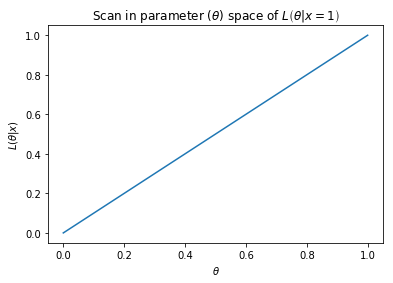

In [2]:
theta = np.linspace(0., 1., num=1000)
likelihood = theta

plt.plot(theta,likelihood)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$L\left(\theta | x\right)$')
plt.title(r'Scan in parameter ($\theta$) space of $L\left(\theta | x=1\right)$')

plt.show();

Each point on the above plot is a value of a probability density function given observed data $\vec{x}$ given the parameter value at that point. The plot itself represents how the value of the probability density of the observed data would change given a scan over the possible parameter values.

### Example: The likelihood function for the mean of a Gaussian

The probability distribution function for the Gaussian is

$$
f\left(\vec{x} \,\big|\, \vec{\theta}\right) = f\left(x \,\big|\, \mu, \sigma\right) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\left(x-\mu\right)/2\sigma^2}
$$

and so the likelihood for data drawn from it is

$$
L\left(\vec{\theta}\right) = \prod_{i=1}^{n}\, f\left(\mu, \sigma \,\big|\, x_i\right) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi} \sigma} e^{-\left(x_i-\mu\right)/2\sigma^2}.
$$

As this is simulated data ("pseudodata") it needs to be generated from a "true" distribution.

In [3]:
# mean and standard deviation
true_mu = np.random.uniform(-0.5,0.5)
true_sigma = np.random.uniform(0.1,1.0)

print('true mean: {:.3f}'.format(true_mu))
print('true standard deviation: {:.3f}'.format(true_sigma))

true mean: 0.190
true standard deviation: 0.487


In [4]:
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 /(2 * sigma**2))

def likelihood(data, parameters):
    return np.prod(gaussian(data, parameters[0], parameters[1]))

The parameter vector is two dimensional, $\vec{\theta} = \left(\mu, \sigma\right)$, but for the simple case consider fixing the standard deviation such that the likelihood function is a function of a single variable: $\mu$.

In [5]:
from ipywidgets import interactive
import ipywidgets as widgets

In [6]:
def draw_likelihood(n_samples=100, true_parameters=[true_mu, true_sigma]):
    mu = np.linspace(-1., 1., num=n_samples)
    sigma = np.repeat(true_sigma, n_samples)
    # sample the distribution
    samples = np.random.normal(true_parameters[0], true_parameters[1], n_samples)

    likelihood_ = np.asarray([likelihood(samples, [mean, sigma]) for mean in mu])
    idx_max_likelihood = np.argmax(likelihood_)


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.5))

    axes[0].plot(mu,likelihood_, label=r'$L\left(\mu | \vec{x}\right)$')
    axes[0].axvline(x=mu[idx_max_likelihood], color='black', linestyle='--',
            label=r'$\mu = {:.3f}$'.format(mu[idx_max_likelihood]))

    axes[0].set_xlabel(r'$\mu$')
    axes[0].set_ylabel(r'$L\left(\mu | \vec{x}\right)$')
    axes[0].set_title('Scan of {0} points in '.format(n_samples) + r'$\mu$ space of $L\left(\mu | \vec{x}\right)$')

    axes[0].legend(loc='best')

    # Repeat for log scale on y-axis
    axes[1].semilogy(mu,likelihood_, label=r'$L\left(\mu | \vec{x}\right)$')
    axes[1].axvline(x=mu[idx_max_likelihood], color='black', linestyle='--',
            label=r'$\mu = {:.3f}$'.format(mu[idx_max_likelihood]))
    axes[1].set_xlabel(r'$\mu$')
    axes[1].set_ylabel(r'$L\left(\mu | \vec{x}\right)$')
    axes[1].set_title('Scan of {0} points in '.format(n_samples) + r'$\mu$ space of $L\left(\mu | \vec{x}\right)$')

    axes[1].legend(loc='best')

    plt.show();

In [7]:
slider_plot = interactive(draw_likelihood, n_samples=widgets.IntSlider(value=100, min=1, max=200, step=1, 
                                                             description=r'$n$ samples', continuous_update=False),
                true_parameters=widgets.fixed([true_mu, true_sigma]))
display(slider_plot)

interactive(children=(IntSlider(value=100, continuous_update=False, description='$n$ samples', max=200, min=1), Output()), _dom_classes=('widget-interact',))

To reiterate, this is a plot of a function in _parameter space_ **given** the observed data.

Given the very distiguishing features of this plot, there is clear motivation to move onto discussions of maximum likelihood esitmators (MLE) in the accompanying notebooks.

## References

- \[1\] R. Fisher, "[On the Mathematical Foundations of Theoretical Statistics](http://www.jstor.org/stable/91208)", _Philosophical Transactions of the Royal Society of London. Series A, Containing Papers of a Mathematical or Physical Character_, Vol. 222, (1922), pp. 309-368
   - This is the paper in which Fisher first introduces the idea of the "method of maximum likelihood".
- \[2\] K. Cranmer, "[Practical Statistics for the LHC](https://inspirehep.net/record/1356277)," arXiv:1503.07622 \[hep-ex\].
- \[3\] [Cross Validated: What is the reason that a likelihood function is not a pdf?](https://stats.stackexchange.com/questions/31238/what-is-the-reason-that-a-likelihood-function-is-not-a-pdf)